# **TEAM 2.**

Josselyn Izamar García Chávez     #1963721 IB

Rodrigo Emilio Sánchez Montemayor #1965542 IB

Julio César de los Santos Muñoz   #2077372 IB

Juan Luis García Gaspar           #1902172 IB



# **Artificial Intelligence final project.**

# **Introduction.**
Brain tumors, spanning from intracranial metastases to meningiomas and glioblastomas, pose a formidable challenge in medical diagnosis and management. As emphasized by J. Ricardo McFaline-Figueroa et al. (2018), a fundamental understanding of these tumors is crucial for general medical providers due to their prevalence. Intracranial metastases, often originating from systemic cancers, alongside meningiomas and gliomas, particularly glioblastoma, constitute the most common forms. The intricate nature of central nervous system metastases demands a multidisciplinary approach, involving neurosurgery, radiation oncology, and medical oncology for comprehensive care.

Management decisions for brain tumors are intricately tied to clinical and radiological information, with the presumed grade dictating the course of treatment, as outlined by Andronicus A Akinyelu et al. (2022). The significance of non-invasive assessment in determining tumor grade cannot be overstated, particularly in guiding treatment strategies. The advent of Deep Learning (DL) techniques, such as Convolutional Neural Networks (CNNs), has been pivotal in the realm of brain tumor diagnosis. The limitations of traditional approaches have spurred the development of innovative techniques, with CNNs playing a central role in leveraging complex patterns within medical imaging datasets.

With this scientific paper, our focus will be on unraveling the complexities associated with the diagnosis, oncologic management, and handling of medical complications related to the most prevalent brain tumors. By synthesizing insights from clinical perspectives and cutting-edge deep learning methodologies, we aim to contribute to the evolving landscape of brain tumor research and healthcare practices.


# **Step 1.** Libraries
The first part consists of importing libraries.


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os

# **Step 2.** Preprocessing
In this section the images are imported, rescaled and divided into training group and validation group. The division of the set of images was 80-20.



In [ ]:
!pip install kaggle
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"josselyngarcia","key":"4ff89ba609622d88913629c9eaea2692"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 98% 145M/149M [00:01<00:00, 144MB/s]
100% 149M/149M [00:01<00:00, 107MB/s]


In [ ]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/brain-tumor-mri-dataset.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [ ]:
imagenes = []
etiquetas = []

In [ ]:
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset/Training'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
class_index = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (128,128), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(class_index)
        class_index += 1

print("Longitud de imagenes:", len(imagenes))
print("Longitud de etiquetas:", len(etiquetas))

Streaming output truncated to the last 5000 lines.
/content/Dataset/Training/notumor/Tr-no_1572.jpg
/content/Dataset/Training/notumor/Tr-no_0137.jpg
/content/Dataset/Training/notumor/Tr-no_1025.jpg
/content/Dataset/Training/notumor/Tr-no_1226.jpg
/content/Dataset/Training/notumor/Tr-no_0139.jpg
/content/Dataset/Training/notumor/Tr-no_0393.jpg
/content/Dataset/Training/notumor/Tr-no_1093.jpg
/content/Dataset/Training/notumor/Tr-no_1329.jpg
/content/Dataset/Training/notumor/Tr-no_0856.jpg
/content/Dataset/Training/notumor/Tr-no_0605.jpg
/content/Dataset/Training/notumor/Tr-no_1366.jpg
/content/Dataset/Training/notumor/Tr-no_0056.jpg
/content/Dataset/Training/notumor/Tr-no_0772.jpg
/content/Dataset/Training/notumor/Tr-no_1367.jpg
/content/Dataset/Training/notumor/Tr-no_0604.jpg
/content/Dataset/Training/notumor/Tr-no_0841.jpg
/content/Dataset/Training/notumor/Tr-no_1090.jpg
/content/Dataset/Training/notumor/Tr-no_0290.jpg
/content/Dataset/Training/notumor/Tr-no_0749.jpg
/content/Dataset/T

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [ ]:
# Normalization
train_images = [image / 255.0 for image in train_images]
test_images = [image / 255.0 for image in test_images]

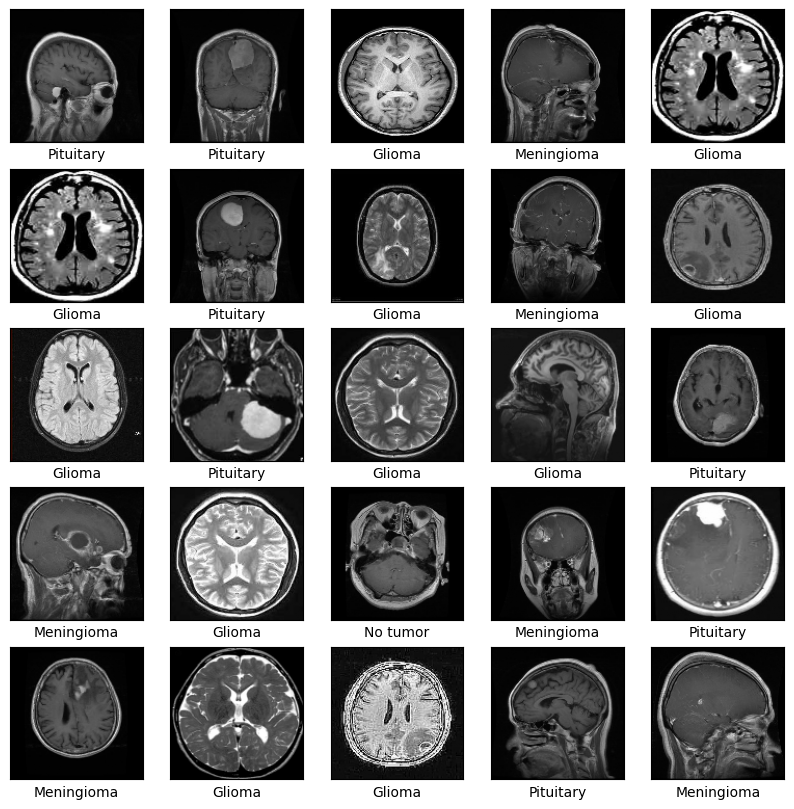

In [ ]:
class_names = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray')
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Structure and training of Convolutional Artificial Neural Network (CNN)**

This section establishes the number of convolution layers and learning layers for our convolutional artificial neural network.



In [ ]:
# Convolutional part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
# Learning Part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [ ]:
# Model Compliation: Features
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# CNN training
train_images = np.array(train_images)
test_images = np.array(test_images)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
143/143 [==============================] - 134s 927ms/step - loss: 0.9347 - accuracy: 0.6185 - val_loss: 0.9764 - val_accuracy: 0.6369
Epoch 2/10
143/143 [==============================] - 131s 915ms/step - loss: 0.5735 - accuracy: 0.7796 - val_loss: 0.4727 - val_accuracy: 0.8206
Epoch 3/10
143/143 [==============================] - 136s 951ms/step - loss: 0.4676 - accuracy: 0.8260 - val_loss: 0.3760 - val_accuracy: 0.8670
Epoch 4/10
143/143 [==============================] - 131s 919ms/step - loss: 0.3864 - accuracy: 0.8584 - val_loss: 0.3384 - val_accuracy: 0.8714
Epoch 5/10
143/143 [==============================] - 131s 915ms/step - loss: 0.3179 - accuracy: 0.8844 - val_loss: 0.3965 - val_accuracy: 0.8434
Epoch 6/10
143/143 [==============================] - 126s 881ms/step - loss: 0.2480 - accuracy: 0.9109 - val_loss: 0.3189 - val_accuracy: 0.8828
Epoch 7/10
143/143 [==============================] - 130s 909ms/step - loss: 0.1839 - accuracy: 0.9343 - val_loss: 0.2693 -

# **CNN Accuracy Results**

36/36 - 6s - loss: 0.2386 - accuracy: 0.9151 - 6s/epoch - 173ms/step


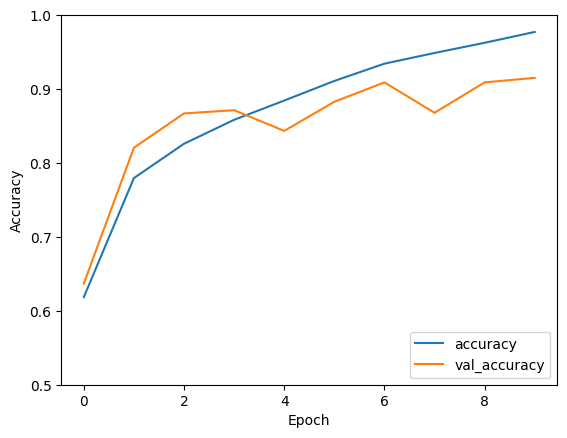

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print("First few true labels:", test_labels[:20])


First few true labels: [1 2 0 3 3 2 3 2 0 0 0 2 1 2 1 2 1 1 0 3]


# **Predictions with the trained CNN.**

In [ ]:
predictions = model.predict(np.array(test_images))
print("Predicted Classes:", predictions)

36/36 [==============================] - 9s 242ms/step
Predicted Classes: [[  3.2530649    8.806295    -0.6756716  ...  -7.859928   -12.309648
   -7.7792296 ]
 [ -1.8024249    0.60114676  10.893152   ...  -9.502503   -12.712697
   -6.3038974 ]
 [ 13.1116495   -1.3194419   -1.8167651  ...  -3.4359102  -11.265902
   -6.9105134 ]
 ...
 [ -2.157133     2.2574658   10.071691   ...  -9.272819   -12.709985
   -8.041646  ]
 [ -0.7678192   12.81305     -0.28063524 ...  -9.691619   -13.876266
   -8.351668  ]
 [ -2.4894874    4.3090506    8.135424   ...  -9.532405   -12.27311
   -8.222721  ]]


36/36 [==============================] - 8s 209ms/step


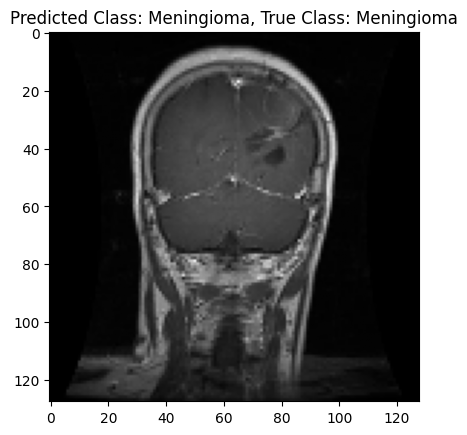

The network predicts that the image is class Meningioma and the true class is: Meningioma


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 0
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

36/36 [==============================] - 8s 212ms/step


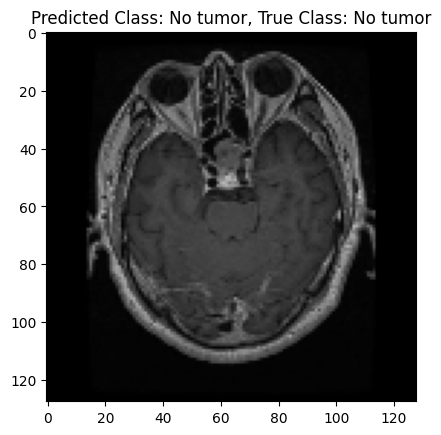

The network predicts that the image is class No tumor and the true class is: No tumor


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 1
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

36/36 [==============================] - 7s 190ms/step


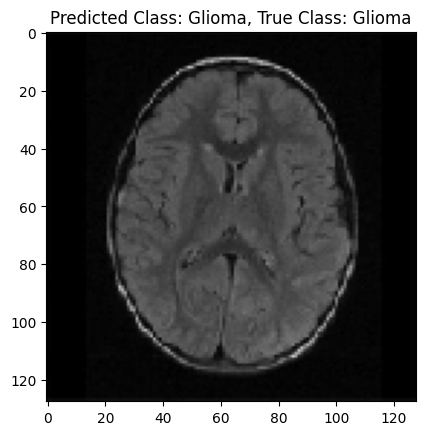

The network predicts that the image is class Glioma and the true class is: Glioma


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 10
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

36/36 [==============================] - 9s 241ms/step


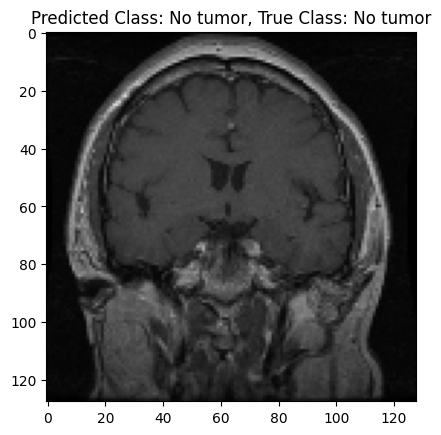

The network predicts that the image is class No tumor and the true class is: No tumor


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 50
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

36/36 [==============================] - 9s 243ms/step


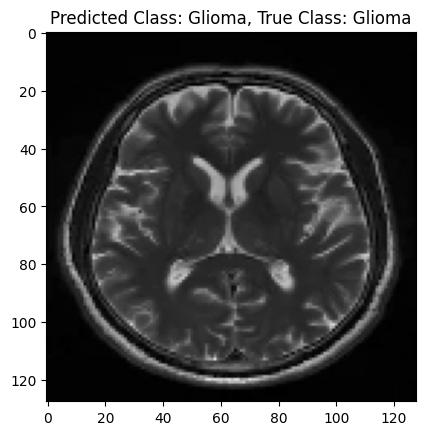

The network predicts that the image is class Glioma and the true class is: Glioma


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 100
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

36/36 [==============================] - 9s 240ms/step


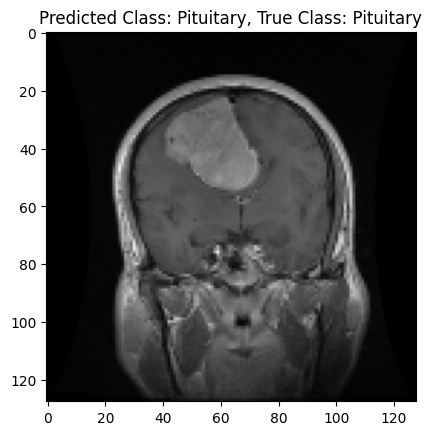

The network predicts that the image is class Pituitary and the true class is: Pituitary


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 300
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

36/36 [==============================] - 8s 209ms/step


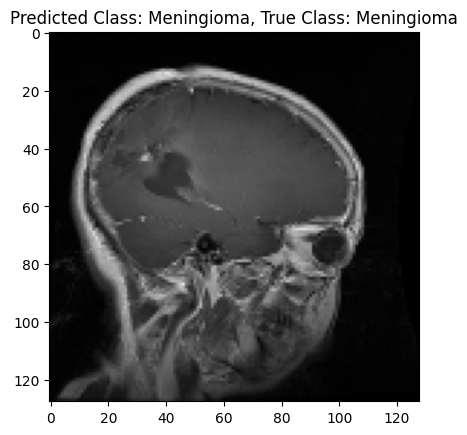

The network predicts that the image is class Meningioma and the true class is: Meningioma


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 310
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

36/36 [==============================] - 9s 238ms/step


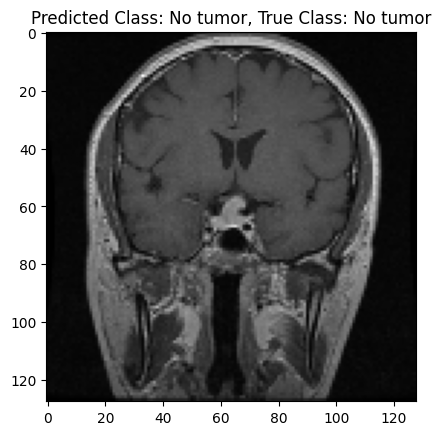

The network predicts that the image is class No tumor and the true class is: No tumor


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 550
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

36/36 [==============================] - 8s 211ms/step


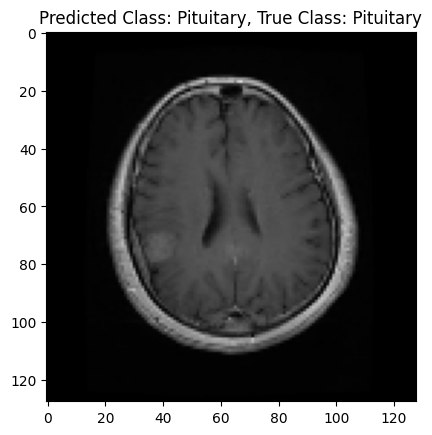

The network predicts that the image is class Pituitary and the true class is: Pituitary


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 600
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

36/36 [==============================] - 7s 185ms/step


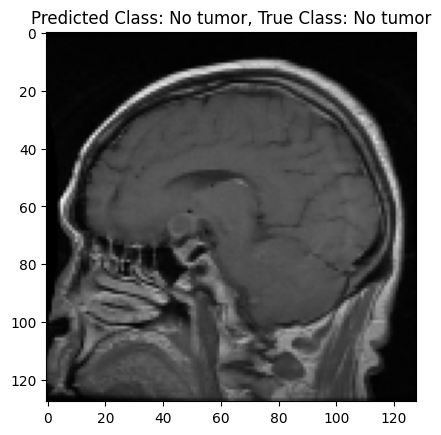

The network predicts that the image is class No tumor and the true class is: No tumor


In [ ]:
predictions = model.predict(np.array(test_images))

# Get the index with the highest prediction for a specific image
image_index = 709
predicted_index = np.argmax(predictions[image_index])
true_label = test_labels[image_index]

# Get the corresponding image from the test set
predicted_image = test_images[image_index]

# Display the predicted image with class names
plt.imshow(predicted_image, cmap='gray')
plt.title(f"Predicted Class: {class_names[predicted_index]}, True Class: {class_names[true_label]}")
plt.show()

print(f"The network predicts that the image is class {class_names[predicted_index]} and the true class is: {class_names[true_label]}")

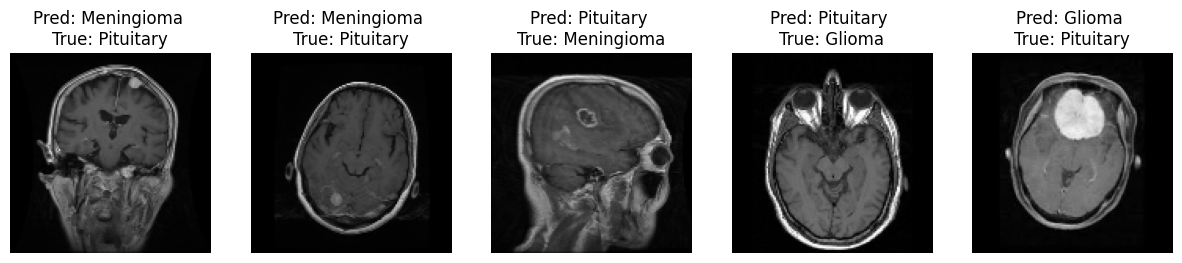

In [ ]:
incorrect_indices = []

for i in range(len(test_labels)):
    predicted_index = np.argmax(predictions[i])
    true_label = test_labels[i]

    if predicted_index != true_label:
        incorrect_indices.append(i)

# Visualize a few incorrect predictions
plt.figure(figsize=(15, 5))
for i, incorrect_index in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[incorrect_index], cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[incorrect_index])]} \nTrue: {class_names[test_labels[incorrect_index]]}")
    plt.axis('off')

plt.show()
